In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  

In [12]:
df=pd.read_pickle("../results/df_encoded_balanced.pkl")
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,EducationField,JobLevel,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,JobInvolvement,PerformanceRating,Age_robust,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,Education_1,Education_2,Education_3,Education_4,Education_5,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,3.0,4.0,2.0,2.0,0.151844,0.163752,1.0,0.120690,0.0,6.0,3.0,3.0,1.153846,-0.083333,1.515065,-0.333333,-0.500000,-1.000000,-0.666667,-0.333333,-0.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,4.0,3.0,0.154691,0.163752,1.0,0.260331,1.0,3.0,2.0,4.0,-0.384615,0.250000,-0.132515,-0.666667,1.500000,-0.444444,0.000000,0.000000,0.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.0,2.0,1.0,3.0,0.154691,0.111157,4.0,0.120690,3.0,2.0,3.0,3.0,-0.307692,0.833333,2.661560,-0.333333,0.166667,-0.555556,0.000000,-0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,4.0,3.0,1.0,0.154691,0.163752,3.0,0.120690,3.0,5.0,2.0,3.0,0.153846,-0.416667,0.630093,0.333333,-0.500000,0.333333,0.500000,2.000000,0.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,3.0,2.0,0.154691,0.166667,1.0,0.260331,2.0,2.0,3.0,3.0,-0.307692,0.250000,-0.473400,0.666667,-0.333333,-0.111111,0.166667,-0.333333,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
variable_dependiente="Attrition"
modelo = sp.AnalisisModelosClasificacion(df, variable_dependiente)

In [14]:
modelo_elegido="xgboost"

In [15]:
logistic_regression_model=modelo.ajustar_modelo(modelo_elegido)

In [16]:
modelo.calcular_metricas(modelo_elegido)

,train,test
accuracy,0.991224,0.898635
precision,0.991314,0.905633
recall,0.991224,0.898635
f1,0.991222,0.898623
kappa,0.982440,0.798056
auc,0.999790,0.955989


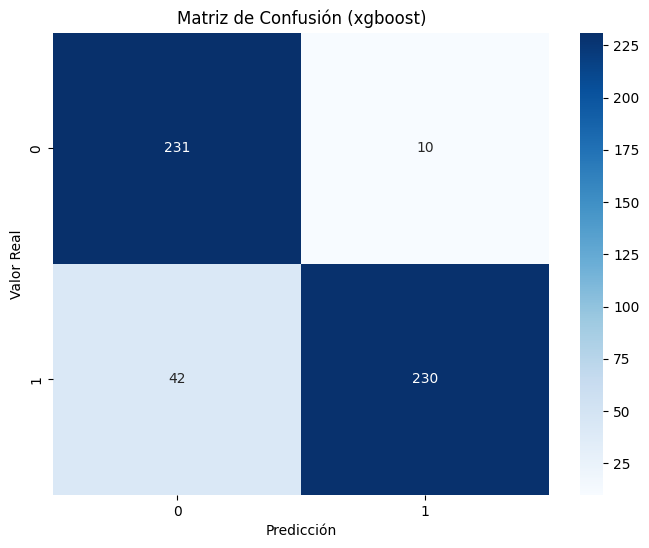

In [17]:
modelo.plot_matriz_confusion(modelo_elegido)

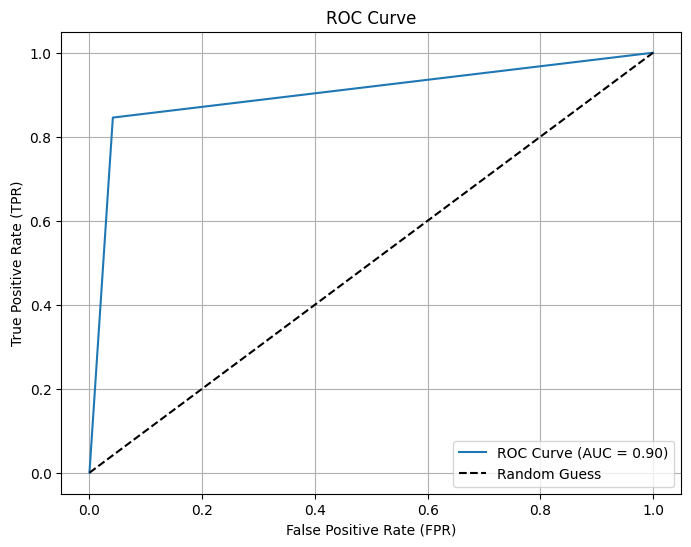

In [18]:
modelo.hacer_roc_curve(modelo_elegido)

c:\Users\alexc\Desktop\GIT\Proyecto8-Employee_Predictor\notebooks\../src\support_modeling.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


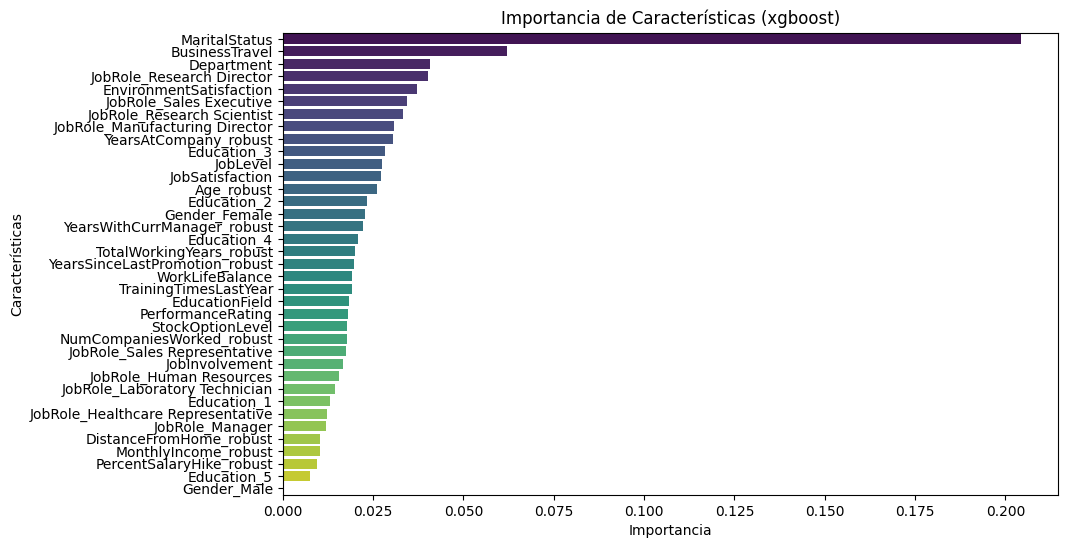

In [19]:
modelo.importancia_predictores(modelo_elegido)

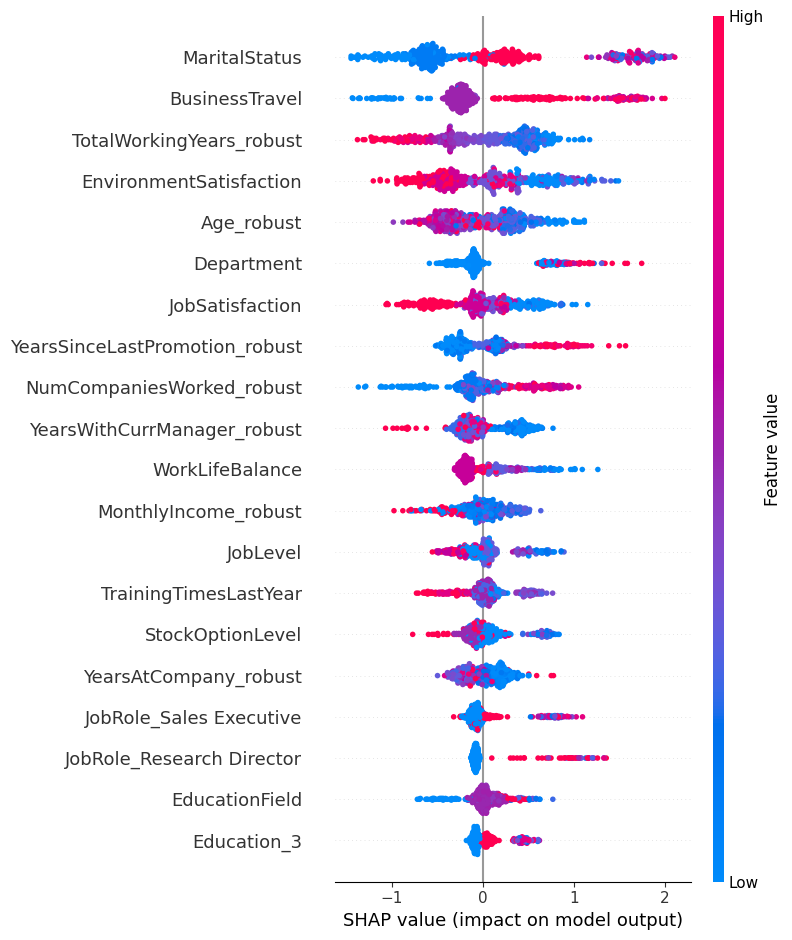

In [20]:
modelo.plot_shap_summary(modelo_elegido)